# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

from plotly.subplots import make_subplots

In [2]:
#%pip install scikit-learn
from sklearn import linear_model

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [3]:
# Your code here.
data = [[1, 17, 10], [2, 51, 1], [3, 27, 5], [4, 21, 9], [5, 36, 4], [6, 48, 2], [7, 19, 9], [8, 26, 6], [9, 54, 0], [10, 30, 3]]
student_data = pd.DataFrame(data, columns=['StudentID', 'Age', 'Tardies'])

Draw a dispersion diagram (scatter plot) for the data.

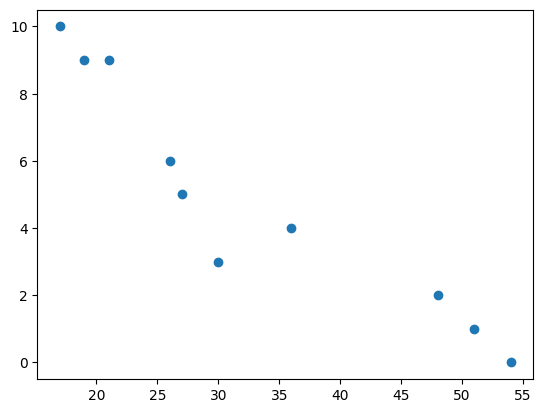

In [4]:
# Your code here.
plt.scatter(x=student_data.Age, y=student_data.Tardies)


Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [5]:
# Your response here. 
#It seems to be a negative linear correlation between Age and Tardies


Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [6]:
# Your response here.
#correlation:
student_data.corr()


,StudentID,Age,Tardies
StudentID,1.000000,0.186190,-0.347113
Age,0.186190,1.000000,-0.939163
Tardies,-0.347113,-0.939163,1.000000


In [7]:
#covariance:
np.cov(student_data.Age, student_data.Tardies)
cov_matrix = np.cov(student_data.Age, student_data.Tardies)
print('covariance matrix: ', cov_matrix[0, 1])

#The covariance matrix is negative, indicating that variables vary in the opposite direction (meaning that when Age grows, Tardies decreases). 
#But covariance doesn't show how strong variables vary together, that's why we need correlation. In this case it's possible to see a strong 
#negative correlation between Age and Tardies (-0.93)

covariance matrix:  -45.56666666666666


Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [8]:
# Your response here.
#select linear regression model
model = linear_model.LinearRegression()


In [9]:
#X-y split
X = student_data.drop('Tardies', axis=1)
y = student_data['Tardies']

X.head()

,StudentID,Age
0,1,17
1,2,51
2,3,27
3,4,21
4,5,36


In [43]:
#Fit model
result1 = model.fit(X, y)

print("Intercept:", result1.intercept_)
print("Coefficient:", result1.coef_[0])

Intercept: 0.32330827067669166
Coefficient: 0.6842105263157895


Plot your regression model on your scatter plot.

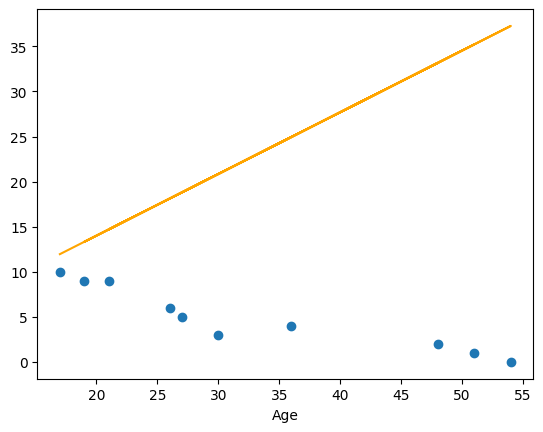

In [45]:
# Your code here.
# Create regression line equation
regression_line = result1.intercept_ + student_data.Age * result1.coef_
plt.plot(student_data.Age, regression_line, c='orange')

# Add line plot and scatter plot
plt.scatter(student_data.Age, student_data.Tardies)
plt.xlabel('Age')
plt.show()

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [ ]:
# Your response here. 
model.score(X, y)

#Yes, the age is a good predictor of tardiness (the higher the age the smaller the probability to be late), because the score of the model is 94%

0.9433811802232854

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [ ]:
# Import any libraries you may need & the data
vehicles = pd.read_csv('vehicles.csv')
vehicles.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [ ]:
clean_vehicles = vehicles[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year', 'CO2 Emission Grams/Mile']]

In [ ]:
# Your response here. 
clean_vehicles.corr(numeric_only=True)
#Cylinders, Fuel Barrels/Year and Fuel Cost/Year have a strong positive correlation with CO2 emmision grams/mile
#Combined MPG has a strong negative correlation with CO2 Emission Grams/Mile
#Year has a weak negative correlation with CO2 Emission Grams/Mile, so it won't be important to predict the CO2 emissions

,Year,Cylinders,Fuel Barrels/Year,Combined MPG,Fuel Cost/Year,CO2 Emission Grams/Mile
Year,1.000000,0.082469,-0.221084,0.204751,-0.091913,-0.222300
Cylinders,0.082469,1.000000,0.739517,-0.698648,0.778153,0.752393
Fuel Barrels/Year,-0.221084,0.739517,1.000000,-0.909743,0.916208,0.986189
Combined MPG,0.204751,-0.698648,-0.909743,1.000000,-0.875185,-0.926229
Fuel Cost/Year,-0.091913,0.778153,0.916208,-0.875185,1.000000,0.930865
CO2 Emission Grams/Mile,-0.222300,0.752393,0.986189,-0.926229,0.930865,1.000000


Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [ ]:
clean_vehicles.isna().sum()

Year                       0
Cylinders                  0
Fuel Barrels/Year          0
Combined MPG               0
Fuel Cost/Year             0
CO2 Emission Grams/Mile    0
dtype: int64

In [ ]:
clean_vehicles.dtypes

Year                         int64
Cylinders                  float64
Fuel Barrels/Year          float64
Combined MPG                 int64
Fuel Cost/Year               int64
CO2 Emission Grams/Mile    float64
dtype: object

In [ ]:
# Your response here. 
model = linear_model.LinearRegression()

#I'm using linear regression model because Pearson correlation showed me that there is a linear correlation between the features and my target

In [ ]:
X = clean_vehicles.drop('CO2 Emission Grams/Mile', axis=1)
y = clean_vehicles['CO2 Emission Grams/Mile']

X.head()

,Year,Cylinders,Fuel Barrels/Year,Combined MPG,Fuel Cost/Year
0,1984,4.0,19.388824,17,1950
1,1984,6.0,25.354615,13,2550
2,1985,4.0,20.600625,16,2100
3,1985,6.0,25.354615,13,2550
4,1987,6.0,20.600625,16,2550


In [ ]:
result2 = model.fit(X, y)

print("Intercept:", result2.intercept_)
print("Coefficient:", result2.coef_)

Intercept: 0.32330827067669166
Coefficient: [0.68421053]


Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [ ]:
# Your response here. 
from sklearn.metrics import mean_squared_error, mean_absolute_error

predictions1 = result2.intercept_ + clean_vehicles['CO2 Emission Grams/Mile'] * result2.coef_
MSE_Year = mean_squared_error(clean_vehicles.Year, predictions1)
print('Year MSE:', MSE_Year)

predictions2 = result2.intercept_ + clean_vehicles['CO2 Emission Grams/Mile'] * result2.coef_
MSE_Cylinders = mean_squared_error(clean_vehicles.Cylinders, predictions2)
print('Cylinders MSE:', MSE_Cylinders)

predictions3 = result2.intercept_ + clean_vehicles['CO2 Emission Grams/Mile'] * result2.coef_
MSE_Fuel_Barrels_Year = mean_squared_error(clean_vehicles['Fuel Barrels/Year'], predictions3)
print('Fuel Barrels/Year MSE:', MSE_Fuel_Barrels_Year)

predictions4 = result2.intercept_ + clean_vehicles['CO2 Emission Grams/Mile'] * result2.coef_
MSE_Combined_MPG = mean_squared_error(clean_vehicles['Combined MPG'], predictions4)
print('Combined MPG MSE:', MSE_Combined_MPG)

predictions5 = result2.intercept_ + clean_vehicles['CO2 Emission Grams/Mile'] * result2.coef_
MSE_Fuel_Cost_Year = mean_squared_error(clean_vehicles['Fuel Cost/Year'], predictions5)
print('Fuel Cost/Year MSE:', MSE_Fuel_Cost_Year)

print('Score: ', model.score(X, y))


Year MSE: 2813319.7519726194
Cylinders MSE: 108679.73863440087
Fuel Barrels/Year MSE: 100759.48453036092
Combined MPG MSE: 100831.31851975151
Fuel Cost/Year MSE: 2642424.945287618
Score:  0.9433811802232854


In [ ]:
#The most important variables in my model are Cylinders, Fuel Barrels/Year and Combined MPG because they have smaller Mean Squared errors. 
# The score of the model is 94%, so it's a great model

## Challenge 2: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [28]:
# Your code here.
data = [[1, 1], [3, 2], [4, 4], [6, 4], [8, 5], [9, 7], [11, 8], [14, 13]]
party_data = pd.DataFrame(data, columns=['people_invited', 'people_unattendence'])


In [29]:
party_data

,people_invited,people_unattendence
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5
5,9,7
6,11,8
7,14,13


Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

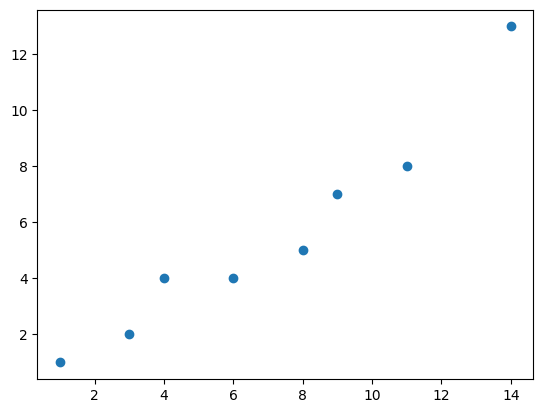

In [30]:
# Your code here.
plt.scatter(x=party_data.people_invited, y=party_data.people_unattendence)


In [31]:
model = linear_model.LinearRegression()

In [32]:
X = party_data.drop('people_unattendence', axis=1)
y = party_data['people_unattendence']

X.head()

,people_invited
0,1
1,3
2,4
3,6
4,8


In [33]:
result3 = model.fit(X, y)

print('Intercept: ', result.intercept_)
print('Coefficient: ', result.coef_)

Intercept:  13.754261583298632
Coefficient:  [-0.20873877 -0.23423095]


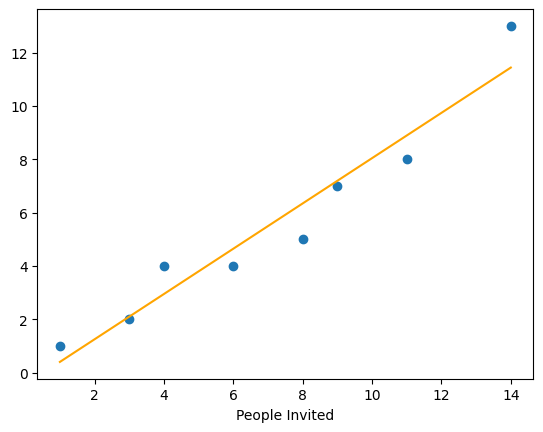

In [34]:
regression_line = result3.intercept_ + party_data.people_invited * result3.coef_
plt.plot(party_data.people_invited, regression_line, c='orange')

plt.scatter(x=party_data.people_invited, y=party_data.people_unattendence)
plt.xlabel('People Invited')
plt.show()

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [35]:
party_data.corr()

,people_invited,people_unattendence
people_invited,1.00000,0.96523
people_unattendence,0.96523,1.00000


In [36]:
model.score(X, y)

0.9316696375519905

In [37]:
# Your response here. 
#With the graph it's possible to see that positive linear correlation between people invited and people unattandence


Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [38]:
# Your response here. 
new_party_data = party_data.drop([7])
new_party_data

#dropping the last row because it's the outier number in the graph


,people_invited,people_unattendence
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5
5,9,7
6,11,8


In [39]:
model = linear_model.LinearRegression()
X = new_party_data.drop('people_unattendence', axis=1)
y = new_party_data['people_unattendence']

X.head()

,people_invited
0,1
1,3
2,4
3,6
4,8


In [40]:
result4 = model.fit(X, y)

print('Intercept: ', result4.intercept_)
print('Coefficient: ', result4.coef_)

Intercept:  0.32330827067669166
Coefficient:  [0.68421053]


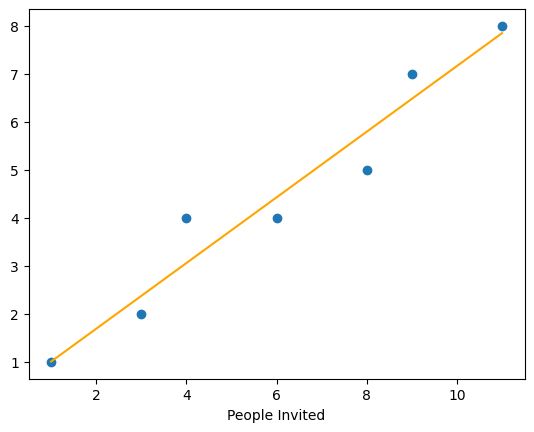

In [41]:
regression_line = result4.intercept_ + new_party_data.people_invited * result4.coef_
plt.plot(new_party_data.people_invited, regression_line, c='orange')

plt.scatter(x=new_party_data.people_invited, y=new_party_data.people_unattendence)
plt.xlabel('People Invited')
plt.show()

In [42]:
model.score(X, y)

0.9433811802232854

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [ ]:
# Your response here. 
#The score of the second model is a little bit higher, indicating that it's a better model compared to the other one. The graph also shows 
# a better regression line withou that outlier. 
